---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [291]:
%matplotlib notebook
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [292]:
# Lets import the .csv file into pandas dataframe
df = pd.read_csv("assets/fraud_data.csv")

# Lets check the shape: there are 21693 rows (transactions) and 30 columns
print(df.shape)

# Lets see the first 5 rows of data
df.head()

(21693, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [293]:
# Lets extract the values from the column class into a np.array and the use the np-bincount method to count the number of
# occurrences of each value.
counts= np.bincount(df["Class"].values)
for name, count in zip(['Not Frauds(0)=\t ','Frauds(1)=\t '],counts):
    print(name,count)

# Lets divide the counts from frauds by total amount of counts
percentage_frauds = counts[1]/(counts[0]+counts[1])

percentage_frauds

Not Frauds(0)=	  21337
Frauds(1)=	  356


0.016410823768035772

In [294]:
def answer_one():
    
    df = pd.read_csv("assets/fraud_data.csv")
    counts= np.bincount(df["Class"].values)
    percentage_frauds = counts[1]/(counts[0]+counts[1])
    
    return percentage_frauds

In [295]:
answer_one()

0.016410823768035772

In [296]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('./fraud_data.csv')

# Selects all the features. To do this all the rows from columns but the last one ("Class") are selected
X = df.iloc[:,:-1]
# Selects the labels. To do this all the rows from the last column "Class" are selected
y = df.iloc[:,-1]

# Lets do train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [297]:
# Lets print the dataframe with it´s features
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7681,-1.332095,0.828224,1.280394,-0.000192,0.006864,0.193420,0.065110,-0.694045,0.020374,0.275932,...,-0.361099,0.632575,-0.286266,0.283056,0.019710,-0.570700,0.409895,-0.669576,-0.374803,4.00
21329,1.900589,-0.850905,-0.856684,0.419809,-0.329338,0.512227,-0.644830,0.083636,-0.622460,1.100660,...,-0.393216,-0.234496,-0.263067,0.151624,0.170524,-0.142015,-0.703641,0.049886,-0.021393,96.00
14695,2.242056,-1.496697,-1.006464,-1.448708,-1.440162,-1.035270,-1.011986,-0.251838,-1.060550,1.598898,...,-0.443243,-0.170011,-0.090092,0.194057,-0.155795,-0.199022,-0.153737,-0.005144,-0.049103,50.00
12338,-0.308109,1.107050,-0.184132,-0.528948,1.000317,-0.517253,0.935125,0.012976,-0.150110,-1.081891,...,0.055325,0.044064,0.465492,-0.370183,-0.561096,-0.152336,0.590986,0.376048,0.248322,3.79
17768,-1.405410,1.985541,-1.290536,-1.672087,1.133642,-1.327069,1.839333,-0.605819,1.243372,2.321808,...,0.881069,-0.058432,0.731687,-0.273287,-0.427056,-0.032592,0.073411,0.779993,0.247911,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2.108057,-0.068298,-1.637994,-0.075459,0.785052,0.170575,0.063027,-0.075121,0.202474,0.209343,...,-0.090014,-0.304134,-0.765574,0.220031,-0.326253,-0.134034,0.208094,-0.074702,-0.072162,0.89
19648,-1.139866,1.130677,0.573881,1.034586,0.177193,-0.011452,-0.018946,0.679649,-0.231098,-0.634133,...,-0.016407,-0.218900,-0.610938,-0.233344,-0.490935,-0.117678,-0.453945,0.206407,0.069866,19.90
9845,1.795059,-0.456973,-2.049603,0.241425,0.347659,-0.217058,0.000488,0.053710,0.971166,-0.695139,...,0.006272,-0.172207,-0.612954,0.077735,0.073546,-0.115195,-0.116337,-0.042548,-0.012938,121.36
10799,1.185560,-0.062333,0.173661,-0.532931,-0.681227,-0.949888,-0.267220,-0.034664,1.528210,-1.577029,...,-0.134965,-0.018312,0.231974,-0.053601,0.319664,0.556433,-0.615846,0.102273,0.053048,7.00


In [298]:
# Lets print the head of the series containing the labels
y_train.head()

7681     0
21329    0
14695    0
12338    0
17768    0
Name: Class, dtype: int64

In [299]:
# Lets see the classes in the y_train dataset, there are only two: 0 = No fraud or 1 = fraud
y_train.unique()

array([0, 1], dtype=int64)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [300]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score

# Lets create a dummy classifier and define the parameter strategy with the most_frequent value
# This dummy classifier will predict the most frequent class (in this case 0) to all its predictions
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

# Lets compute the accuracy of the dummy classifier
accuracy = dummy_majority.score(X_test, y_test)

# Lets compute the recall score of the dummy classifier, but first we need the predictions of the classifier
y_dummy_predictions = dummy_majority.predict(X_test)
recall = recall_score(y_test, y_dummy_predictions)

# Now that we have both values we can make a tuple containing (accuracy score, recall score)
result = (accuracy, recall)

result

# We can see that the accuracy is pretty high because the two classes are unbalanced.
# This accuracy is our baseline, our classifier should improve this value.
# The recall value es 0, meaning that from all the positive instances in y_test, zero were correctly predicted

(0.9852507374631269, 0.0)

In [301]:
# Lets analyze why the recall value is 0.0
# Lets see how many frauds in y_test were correctly predicted in the dummy predicions
y_dummy_predictions[y_test==1]

# We can see that from all the 80 frauds inside y_test, none were classified as possitive in y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [302]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    # Creation of dummy classifier and predictions
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    
    accuracy = dummy_majority.score(X_test, y_test)
    recall = recall_score(y_test, y_dummy_predictions)

    result = (accuracy, recall)

    return result

In [303]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [304]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

# Lets create classifier and train it
svm = SVC().fit(X_train, y_train)
# Lets make predictions with the classifier with not previously seen data in X_test
y_svm_predictions = svm.predict(X_test)

# Compute different scores
accuracy = svm.score(X_test, y_test)
recall = recall_score(y_test, y_svm_predictions)
precision = precision_score(y_test, y_svm_predictions)

result = (accuracy,recall, precision)

result

# The precision incrased compared to the dummy, so more TP and TN are being well assigned
# Recall is 0,35 meaning that only 1/3 of the frauds (TP) are being identified, but still 2/3 of the frauds
# are not being detected and considered FN.
# Precision is high, but indicate that from all the frauds identified, some of them are false positives.

(0.9900442477876106, 0.35, 0.9333333333333333)

In [305]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    # Lets create classifier and train it
    svm = SVC().fit(X_train, y_train)
    # Lets make predictions with the classifier with not previously seen data in X_test
    y_svm_predictions = svm.predict(X_test)

    # Compute different scores
    accuracy = svm.score(X_test, y_test)
    recall = recall_score(y_test, y_svm_predictions)
    precision = precision_score(y_test, y_svm_predictions)

    result = (accuracy,recall, precision)

    return result

In [306]:
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [307]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

# Lets create classifier and train it
svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
# Lets make predictions with the classifier with not previously seen data in X_test
y_svm_predictions = svm.predict(X_test)
# Lets compute the decision function for each prediction inside y_svm_predictions
y_svm_scores = svm.decision_function(X_test)


In [308]:
# If we make the confusion_matrix with the y_predictions we can see that has the same values
# as making a confusion matrix with the y_svm_scores>0 (choosing a threshold of cero)

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_svm_predictions)
confusion

array([[5340,    4],
       [  16,   64]], dtype=int64)

In [309]:
# Making a confusion matrix choosing a threshold = 0
confusion_threshold_0 = confusion_matrix(y_test, y_svm_scores>0)
confusion_threshold_0

array([[5340,    4],
       [  16,   64]], dtype=int64)

In [310]:
# So lets make a confusion_matrix choosing a threshold of -200. 
# Every instance that has a decision score > -200 will be considered in the positive prediction boundary:
# if the y_label is 1 will be a TP and if it is 0 will be a FP.
# On the other hand, 
# Every instance that has a decision score < -200 will be considered in the negative prediction boundary:
# if the y_label is 1 will be a FN and if it is 0 will be a TN

confusion_final = confusion_matrix(y_test, y_svm_scores>-220)
confusion_final

array([[5320,   24],
       [  14,   66]], dtype=int64)

In [311]:
set(y_test.values)

{0, 1}

In [312]:
def answer_four():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    from sklearn.metrics import confusion_matrix
    
    # Lets create classifier and train it
    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    # Lets make predictions with the classifier with not previously seen data in X_test
    y_svm_predictions = svm.predict(X_test)
    # Lets compute the decision function for each prediction inside y_svm_predictions
    y_svm_scores = svm.decision_function(X_test)
    
    # Lets make the confusion matrix choosing the threshold value of -200
    threshold = -200
    confusion = confusion_matrix(y_test, y_svm_scores>threshold)
    
    return confusion

In [313]:
answer_four()

array([[5324,   20],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt 

# Lets create and train a logistic classifier (max_iter=1000 was added to avoid getting an error)
lr = LogisticRegression()
lr.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [245]:
# We can see some attributes of the classifier
lr.classes_, lr.coef_

(array([0, 1], dtype=int64),
 array([[ 0.16335314, -0.30987534, -0.16938307,  0.70358402, -0.25133386,
          0.00821179,  0.1176036 , -0.35996026, -0.36027491, -0.5512679 ,
          0.32627051, -0.44146436, -0.21813311, -0.88294653, -0.28661472,
         -0.44678643, -0.16862859,  0.01275379,  0.00678132,  0.60364752,
          0.31949757,  0.04518955,  0.21284271,  0.07404523, -0.07308419,
         -0.23256036,  0.22897678,  0.17149488, -0.00391441]]))

In [246]:
X_test.shape

(5424, 29)

In [381]:
### Lets evaluate the model
#Lets compute .predict_proba() for X_test ir order to get the probability estimates for X_test
# As a result two probabilities are computed: the first column the prob. to be predicted/classified as 0, and the second one the prob.
# to be classified as 1/fraud.
y_proba_lr = lr.predict_proba(X_test)
# We grab the probabilistic values of the second column because we want the probability of being a fraud=1 (positiva class)
y_proba_lr_fraud = y_proba_lr[:,1]


In [382]:
# Lets compute precision, recall and thresholds (required for precision-recall curve) using the probability estimates of the positive class
precision, recall, threshold = precision_recall_curve(y_test, y_proba_lr_fraud)
# Lets compute false positive and true positive rates (required for ROC) using the probability estimates of the positive class
fpr, tpr, _ = roc_curve(y_test, y_proba_lr_fraud)



<IPython.core.display.Javascript object>


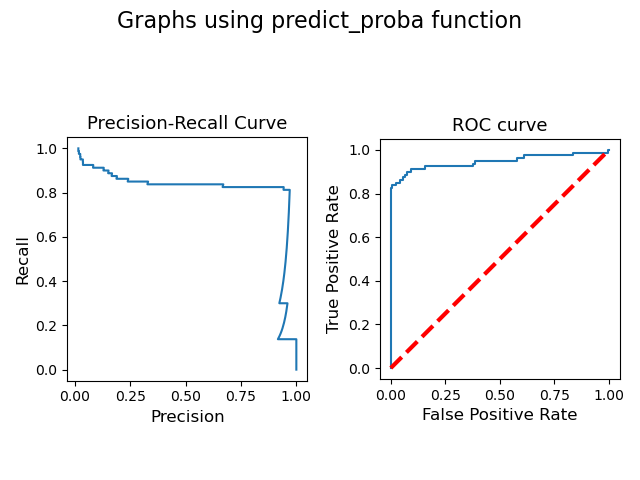

In [383]:
### Making graphs
# Initialize the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2)
  
# Precision-Recall curve
axis[0].plot(precision, recall)
axis[0].set_xlabel('Precision', fontsize=12)
axis[0].set_ylabel('Recall', fontsize=12)
axis[0].set_title('Precision-Recall Curve', fontsize=13)
axis[0].set_aspect('equal')

# ROC curve
axis[1].plot(fpr, tpr)
axis[1].plot([0, 1], [0, 1], color='red', lw=3, linestyle='--') # Plots y = x
axis[1].set_xlabel('False Positive Rate', fontsize=12)
axis[1].set_ylabel('True Positive Rate', fontsize=12)
axis[1].set_title('ROC curve', fontsize=13)
axis[1].set_aspect('equal')

plt.suptitle('Graphs using predict_proba function' ,fontsize=16)
plt.tight_layout()

plt.show()

In [445]:
# what is the recall when the precision is 0.75?
# with np.where(condition) we find all the indexes where precision is >= 0,75 and we choose the first value
# That first value will contain precision index for == 0.75 or the next closest value
# Finally we find the recall value with the index found in precision array
result_1 = recall[np.where(precision>=0.75)][0]
result_1

0.825

In [444]:
# what is the true positive rate when the false positive rate is 0.16?
result_2 = tpr[np.where(fpr >=0.16)][0]
result_2

0.925

In [447]:
result = result_1, result_2
result

(0.825, 0.925)

In [460]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt 

    # Lets create and train a logistic classifier (max_iter=1000 was added to avoid getting an error)
    lr = LogisticRegression().fit(X_train, y_train)

    ### Lets compute predict_proba for X_test
    # As a result two probabilities are computed: the first column the prob. to be classified as 0, and the second one the prob.
    # to be classified as 1/fraud.
    y_proba_lr = lr.predict_proba(X_test)
    # We grab the probabilistic values of the second column because we want the probability of being a fraud
    y_proba_lr = y_proba_lr[:,1]
    
    ### Computes values for Precision-Recall and ROC curves:
    precision, recall, threshold = precision_recall_curve(y_test, y_proba_lr)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    
    ### If we want to make a graph of the Precision-Recall and ROC curves
    
    def make_graph(fpr_lr, tpr_lr):
        # Initialise the subplot function using number of rows and columns
        figure, axis = plt.subplots(1, 2)

        # Precision-Recall curve
        axis[0].plot(precision, recall)
        axis[0].set_xlabel('Precision', fontsize=12)
        axis[0].set_ylabel('Recall', fontsize=12)
        axis[0].set_aspect('equal')
        axis[0].set_title('Precision-Recall Curve', fontsize=13)

        # ROC curve
        axis[1].plot(fpr_lr, tpr_lr)
        axis[1].plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        axis[1].set_xlabel('False Positive Rate', fontsize=12)
        axis[1].set_ylabel('True Positive Rate', fontsize=12)
        axis[1].set_title('ROC curve)', fontsize=13)
        axis[1].set_aspect('equal')

        plt.suptitle('Graphs using predict_proba functions',fontsize=16)
        plt.tight_layout()

        plt.show()
    
    ### Comment / Uncomment the following line to see the curves
    make_graph(fpr_lr, tpr_lr)
    
    ### Computing Recall and Tpr in case you want a more specific number instead of watching the graphs
    # As the graph Y axis units are with one decimal
    # what is the recall when the precision is 0.75
    result_1 = recall[np.where(precision>=0.75)][0]
    
    # what is the true positive rate when the false positive rate is 0.16?
    #result_2 = tpr[np.where(fpr >=0.16)][0]
    
    # In the discussion they commented that there is a typo mistake and the fpr should be = 0.61
    # what is the true positive rate when the false positive rate is 0.61?
    result_2 = tpr_lr[np.where(fpr_lr >=0.61)][0]
    
    result = (result_1, result_2)
    
    return result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


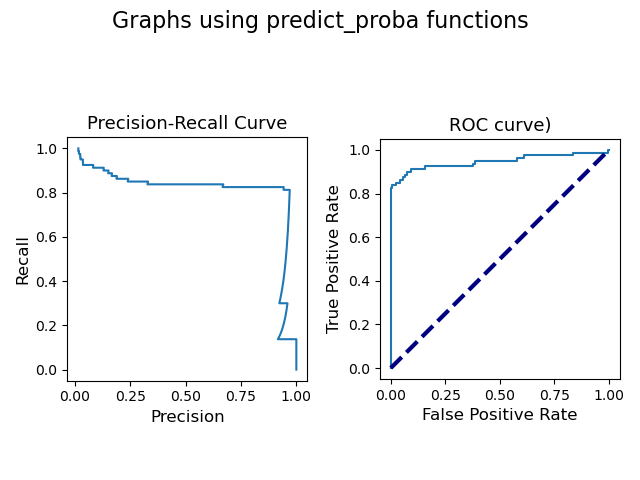

(0.825, 0.975)

In [461]:
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [494]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## 1- Lets create the Logistic classifier
clf = LogisticRegression(solver='liblinear')

## 2- Lets create the GridClassifierCV
# Define the hyperparameters to test
grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10,100]}
# Create the gridclassifier defining the grid_values to test, the metric to evaluate them and the number of cross folds
grid_clf_recall = GridSearchCV(clf, param_grid=grid_values, scoring="recall", cv=3)
# Lets train the Gridclassifier
grid_clf_recall.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [495]:
# Lets print the best parameters obtained and their (best) recall score
print('Best params:\t\t {}'.format(grid_clf_recall.best_params_))
print('Best recall score:\t {}'.format(grid_clf_recall.best_score_))

Best params:		 {'C': 1, 'penalty': 'l1'}
Best recall score:	 0.8115942028985508


In [496]:
# Inside the attribute cv_results_ we can see all the results as dictionary of keys with a numpy array for each.
# The key 'mean_test_score' has the recall scores for the different combinations
result = grid_clf_recall.cv_results_['mean_test_score'].reshape(-1,2)
result

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

In [490]:
# We can see that the shape is (5,2) as requested
result.shape, type(result)

((4, 2), numpy.ndarray)

In [473]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    ## 1- Lets create the Logistic classifier
    clf = LogisticRegression(solver='liblinear')

    ## 2- Lets create the GridClassifierCV
    # Define the hyperparameters to test
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10]}
    # Create the gridclassifier defining the grid_values to test, the metric to evaluate them and the nr. of crossfolds
    grid_clf_recall = GridSearchCV(clf, param_grid=grid_values, scoring="recall", cv=3)
    # Lets train the Gridclassifier
    grid_clf_recall.fit(X_train, y_train)
    
    # Lets extract all the recall mean scores corresponding to l1 and l2 from grid_clf_recall.cv_results_ 
    # and reshape them in two columns
    result = grid_clf_recall.cv_results_['mean_test_score'].reshape(-1,2)
    
    return result

In [474]:
answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


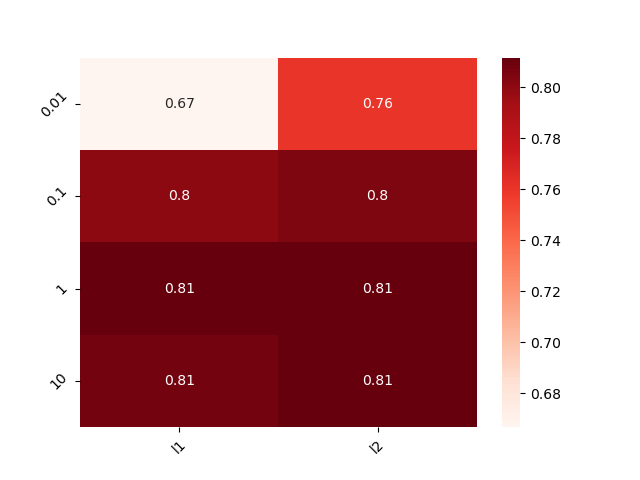

In [475]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10], annot=True, cmap="Reds")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45);

GridSearch_Heatmap(answer_six())